In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn

# 0. Описание задачи
Определение диапозона цен на телефоны при известных параметрах: емкость батареи, поддержка bluetooth, количество симкарт и других.
## 1. Загрузка и чтение данных
Весь датасет находится в репозитории для сдачи лабораторный работ в папке DataSet

In [2]:
url = "https://raw.githubusercontent.com/BelikJulia/machine-learning/main/DataSet/MP.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(3000, 21)

Таблица содержит данный о 3000 моделей телефонов с описанием 20 параметров

In [3]:
data_raw.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,NaN,NaN,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1


Признаки:
1. battery_power - емкость батареи в mAh
2. blue - наличие Bluetooth (0 - нет, 1 - да)
3. clock_speed - скорость, с которой микропроцессор выполняет инструкции 
4. dual_sim - поддержка двух SIM-карт (0 - нет, 1 - да)
5. fc - разрешение фронтальной камеры в Мп
6. four_g - поддержка 4G (0 - нет, 1 - да)
7. int_memory - внутренняя память в Гб
8. m_dep - глубина телефона в см
9. mobile_wt - вес телефона
10. n_cores - количество ядер процессора
11. pc - разрешение основной камеры в Мп
12. px_height - разрешение в высоту в пикселях
13. px_width - разрешение в ширину в пикселях
14. ram - оперативная память в Мб
15. sc_h - высота экрана в см
16. sc_w - ширина экрана в см
17. talk_time - максимальное время, в течение которого хватит одной зарядки аккумулятора, когда вы говорите по телефону
18. three_g - поддержка 3G (0 - нет, 1 - да)
19. touch_screen - наличие сенсорного экрана (0 - нет, 1 - да)
20. wifi - наличие wifi (0 - нет, 1 - да)
21. price_range - ценовой диапазон

In [4]:
data_raw.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Имена строк (совпадают с номерами)

In [5]:
data_raw.index

RangeIndex(start=0, stop=3000, step=1)

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2993 non-null   float64
 1   blue           2985 non-null   float64
 2   clock_speed    2995 non-null   float64
 3   dual_sim       2985 non-null   float64
 4   fc             2993 non-null   float64
 5   four_g         2981 non-null   float64
 6   int_memory     2993 non-null   float64
 7   m_dep          2991 non-null   float64
 8   mobile_wt      2991 non-null   float64
 9   n_cores        2991 non-null   float64
 10  pc             2987 non-null   float64
 11  px_height      2992 non-null   float64
 12  px_width       2995 non-null   float64
 13  ram            2995 non-null   float64
 14  sc_h           2993 non-null   float64
 15  sc_w           2994 non-null   float64
 16  talk_time      2991 non-null   float64
 17  three_g        2992 non-null   float64
 18  touch_sc

 0. battery_power - числовой 
 1. blue - категориальный (2)
 2. clock_speed - числовой
 3. dual_sim - категориальный (2)
 4. fc - числовой
 5. four_g - категориальный (2)
 6. int_memory - числовой
 7. m_dep - числовой
 8. mobile_wt - числовой
 9. n_cores - числовой
 10. pc - числовой
 11. px_height - числовой
 12. px_width - числовой
 13. ram - числовой
 14. sc_h - числовой
 15. sc_w - числовой
 16. talk_time - числовой
 17. three_g - категориальный (2)
 18. touch_screen - категориальный (2)
 19. wifi - категориальный (2)
 20. price_range - категориальный (4)
 
### Обработка выбросов

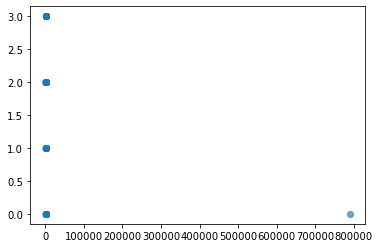

In [7]:
plt.scatter(data_raw['battery_power'], data_raw['price_range'], alpha=0.4)
pass

Заметим, что есть выбросы

In [8]:
data_raw['battery_power'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     503.96
0.010     508.00
0.050     568.00
0.100     630.60
0.500    1231.00
0.900    1852.80
0.950    1931.20
0.990    1988.08
0.995    1994.00
Name: battery_power, dtype: float64

99,9% значений емкости батареи находятся в диапазоне от 504 до 1993

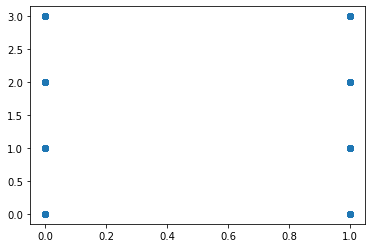

In [9]:
plt.scatter(data_raw['blue'], data_raw['price_range'], alpha=0.4)
pass

In [10]:
data_raw['blue'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.0
0.010    0.0
0.050    0.0
0.100    0.0
0.500    0.0
0.900    1.0
0.950    1.0
0.990    1.0
0.995    1.0
Name: blue, dtype: float64

Выбросов нет

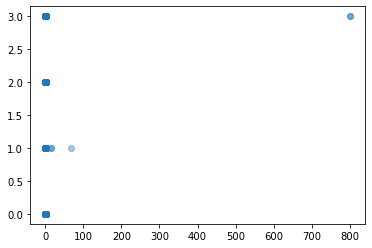

In [11]:
plt.scatter(data_raw['clock_speed'], data_raw['price_range'], alpha=0.4)
pass

In [12]:
data_raw['clock_speed'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.5
0.010    0.5
0.050    0.5
0.100    0.5
0.500    1.5
0.900    2.7
0.950    2.8
0.990    3.0
0.995    3.0
Name: clock_speed, dtype: float64

Есть выбросы, которые удалим далее

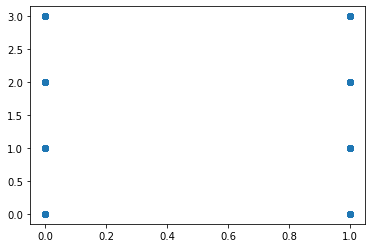

In [13]:
plt.scatter(data_raw['dual_sim'], data_raw['price_range'], alpha=0.4)
pass

Выбросов нет

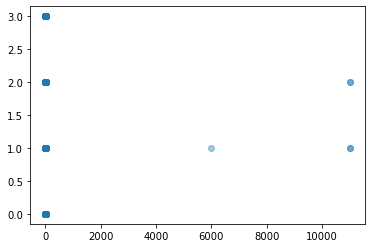

In [14]:
plt.scatter(data_raw['fc'], data_raw['price_range'], alpha=0.4)
pass

In [15]:
data_raw['fc'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.00
0.010     0.00
0.050     0.00
0.100     0.00
0.500     3.00
0.900    11.00
0.950    13.00
0.990    16.08
0.995    18.00
Name: fc, dtype: float64

Есть выбросы

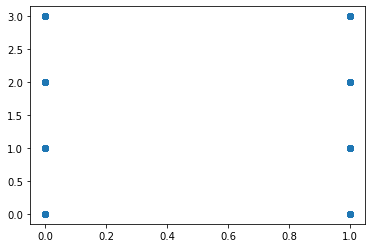

In [16]:
plt.scatter(data_raw['four_g'], data_raw['price_range'], alpha=0.4)
pass

Выбросов нет

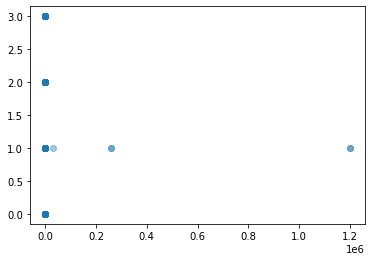

In [17]:
plt.scatter(data_raw['int_memory'], data_raw['price_range'], alpha=0.4)
pass

In [18]:
data_raw['int_memory'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     2.0
0.010     2.0
0.050     5.0
0.100     8.0
0.500    33.0
0.900    57.0
0.950    61.0
0.990    64.0
0.995    64.0
Name: int_memory, dtype: float64

Есть выбросы

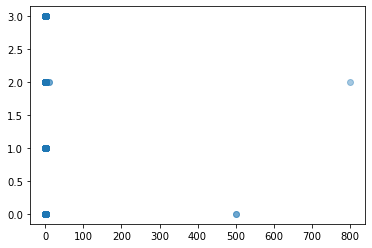

In [19]:
plt.scatter(data_raw['m_dep'], data_raw['price_range'], alpha=0.4)
pass

In [20]:
data_raw['m_dep'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.1
0.010    0.1
0.050    0.1
0.100    0.1
0.500    0.5
0.900    0.9
0.950    1.0
0.990    1.0
0.995    1.0
Name: m_dep, dtype: float64

Есть выбросы

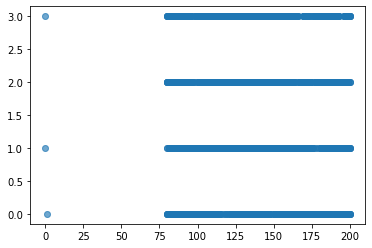

In [21]:
plt.scatter(data_raw['mobile_wt'], data_raw['price_range'], alpha=0.4)
pass

In [22]:
data_raw['mobile_wt'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     80.0
0.010     80.0
0.050     86.0
0.100     91.0
0.500    141.0
0.900    189.0
0.950    196.0
0.990    199.0
0.995    200.0
Name: mobile_wt, dtype: float64

Есть выбросы

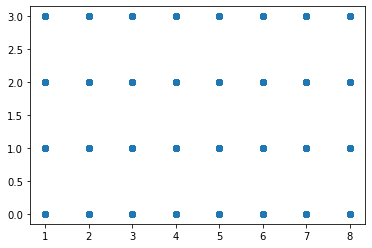

In [23]:
plt.scatter(data_raw['n_cores'], data_raw['price_range'], alpha=0.4)
pass

Выбросов нет

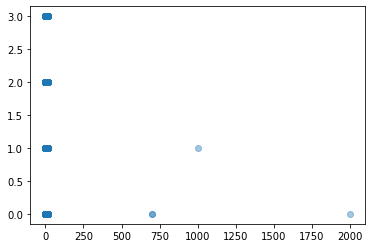

In [24]:
plt.scatter(data_raw['pc'], data_raw['price_range'], alpha=0.4)
pass

In [25]:
data_raw['pc'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     0.0
0.100     1.0
0.500    10.0
0.900    18.0
0.950    20.0
0.990    20.0
0.995    20.0
Name: pc, dtype: float64

Есть выбросы

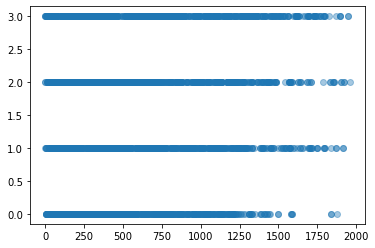

In [26]:
plt.scatter(data_raw['px_height'], data_raw['price_range'], alpha=0.4)
pass

In [27]:
data_raw['px_height'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       4.00
0.010      14.91
0.050      70.00
0.100     126.10
0.500     561.00
0.900    1285.00
0.950    1486.00
0.990    1792.27
0.995    1869.00
Name: px_height, dtype: float64

Выбросов нет

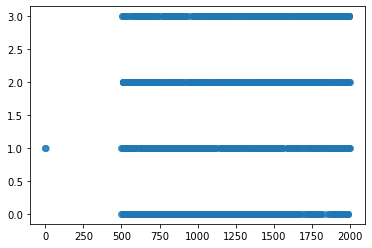

In [28]:
plt.scatter(data_raw['px_width'], data_raw['price_range'], alpha=0.4)
pass

In [29]:
data_raw['px_width'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     507.0
0.010     511.0
0.050     573.4
0.100     660.0
0.500    1247.0
0.900    1854.0
0.950    1929.0
0.990    1987.0
0.995    1992.0
Name: px_width, dtype: float64

Есть выбросы

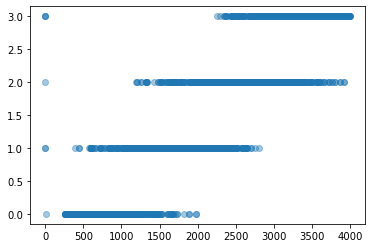

In [30]:
plt.scatter(data_raw['ram'], data_raw['price_range'], alpha=0.4)
pass

In [31]:
data_raw['ram'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     272.82
0.010     290.70
0.050     441.00
0.100     597.40
0.500    2169.00
0.900    3652.00
0.950    3828.10
0.990    3959.00
0.995    3970.00
Name: ram, dtype: float64

Есть выбросы

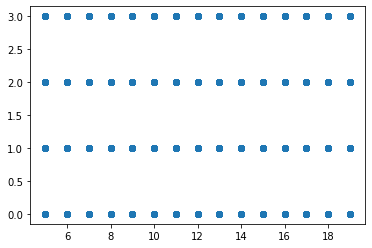

In [32]:
plt.scatter(data_raw['sc_h'], data_raw['price_range'], alpha=0.4)
pass

Выбросов нет

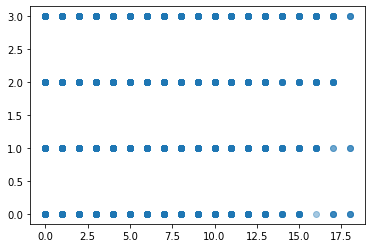

In [33]:
plt.scatter(data_raw['sc_w'], data_raw['price_range'], alpha=0.4)
pass

Выбросов нет

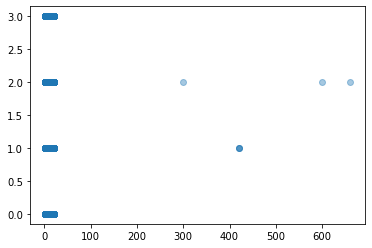

In [34]:
plt.scatter(data_raw['talk_time'], data_raw['price_range'], alpha=0.4)
pass

In [35]:
data_raw['talk_time'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     2.0
0.010     2.0
0.050     3.0
0.100     4.0
0.500    11.0
0.900    19.0
0.950    20.0
0.990    20.0
0.995    20.0
Name: talk_time, dtype: float64

Выбросы есть

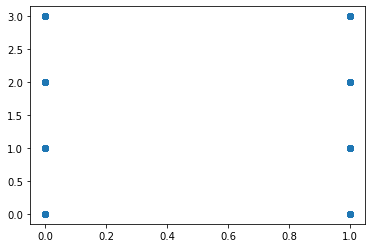

In [36]:
plt.scatter(data_raw['three_g'], data_raw['price_range'], alpha=0.4)
pass

Выбросов нет

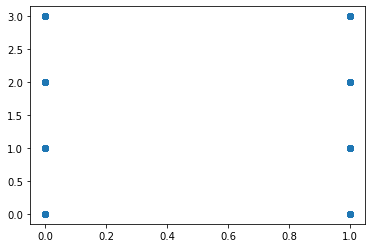

In [37]:
plt.scatter(data_raw['touch_screen'], data_raw['price_range'], alpha=0.4)
pass

Выбросов нет

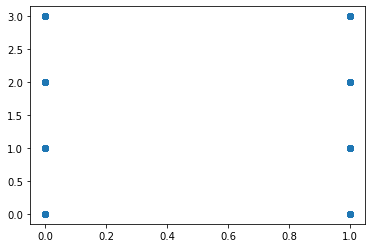

In [38]:
plt.scatter(data_raw['wifi'], data_raw['price_range'], alpha=0.4)
pass

Выбросов нет

Удалим все строки таблицы, в которых признаки с выбросами выходят за пределы квантилей $0.005$, $0.995$.

In [39]:
rows_to_drop = data_raw[
    (data_raw['battery_power'] < data_raw['battery_power'].quantile(0.005)) | (data_raw['battery_power'] > data_raw['battery_power'].quantile(0.995)) | 
    (data_raw['clock_speed']  < data_raw['clock_speed' ].quantile(0.005)) | (data_raw['clock_speed']  > data_raw['clock_speed' ].quantile(0.995)) | 
    (data_raw['fc']  < data_raw['fc' ].quantile(0.005)) | (data_raw['fc']  > data_raw['fc' ].quantile(0.995)) |
    (data_raw['int_memory']  < data_raw['int_memory' ].quantile(0.005)) | (data_raw['int_memory']  > data_raw['int_memory' ].quantile(0.995)) | 
    (data_raw['m_dep']  < data_raw['m_dep' ].quantile(0.005)) | (data_raw['m_dep']  > data_raw['m_dep' ].quantile(0.995)) |
    (data_raw['mobile_wt']  < data_raw['mobile_wt' ].quantile(0.005)) | (data_raw['mobile_wt']  > data_raw['mobile_wt' ].quantile(0.995)) | 
    (data_raw['pc']  < data_raw['pc' ].quantile(0.005)) | (data_raw['pc']  > data_raw['pc' ].quantile(0.995)) |
    (data_raw['px_width']  < data_raw['px_width' ].quantile(0.005)) | (data_raw['px_width']  > data_raw['px_width' ].quantile(0.995)) | 
    (data_raw['ram']  < data_raw['ram' ].quantile(0.005)) | (data_raw['ram']  > data_raw['ram' ].quantile(0.995)) |
    (data_raw['talk_time']  < data_raw['talk_time' ].quantile(0.005)) | (data_raw['talk_time']  > data_raw['talk_time' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(2879, 21)

In [40]:
rows_to_drop

Int64Index([  18,   24,   43,   61,   69,  152,  167,  185,  193,  219,
            ...
            2739, 2754, 2772, 2780, 2806, 2875, 2879, 2896, 2914, 2944],
           dtype='int64', length=121)

 ## 2. Визуализация данных и вычисление основных характеристик

In [41]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2874.000000,2864.000000,2874.000000,2867.000000,2873.000000,2860.000000,2872.000000,2870.000000,2870.000000,2870.000000,...,2871.000000,2874.000000,2876.000000,2872.000000,2873.000000,2870.000000,2871.000000,2876.000000,2876.000000,2879.000000
mean,1238.826722,0.486034,1.522930,0.511336,4.300035,0.514336,32.466574,0.501429,140.709059,4.510453,...,643.615674,1247.704593,2135.609179,12.336351,5.743126,11.003833,0.756183,0.507650,0.512865,1.513025
std,439.068508,0.499892,0.821102,0.499959,4.354478,0.499882,18.187908,0.286092,35.359785,2.289076,...,444.805337,429.223234,1083.050846,4.210546,4.365940,5.433362,0.429459,0.500028,0.499921,1.122030
min,504.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,507.000000,273.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,850.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,280.000000,874.000000,1210.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.500000
50%,1231.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,561.000000,1247.000000,2181.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1617.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.700000,171.000000,7.000000,...,952.000000,1617.750000,3068.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1994.000000,1.000000,3.000000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1992.000000,3970.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


В описании видим:

1. count - количество значений для каждого признака. Из-за пропусков в таблице все значения различны. Минимальное значение у dual_sim = 2867, число пропусков = 12, что составлеят 0,4% от общего числа.
2. mean - среднее значение
3. std - стандартное отклонение
4. min - минимальное значение 
5. 25% - первый квартиль
6. 50% - медиана
7. 75% - третий квартиль
8. max - максимальное значение (заметим подозрительно большие значения - выбросы, с которыми будм бороться в дальнейшем)

Рассмотрим некоторые из характеристик

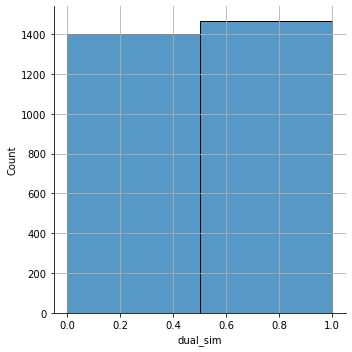

In [42]:
sns.displot(data['dual_sim'], bins=2)
plt.grid()
pass

На гистограмме видно распределение по 2 категориям: наличие и отсутствие поддержки 2 симкарт. Среднее значение = 0.511336, отклонение = 0.499959. Можно сделать вывод, что чуть больше половины моделей имеет 2 симкарты.

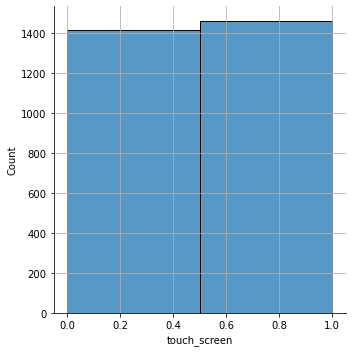

In [43]:
sns.displot(data['touch_screen'], bins=2)
plt.grid()
pass

Видим нормальное распределение по категориям: наличие и отсутствие сенсорного экрана. При среднем = 0.507650 и отклонении = 0.500028, то есть, число моделей с сенсорным экраном и обычным примерно равны.

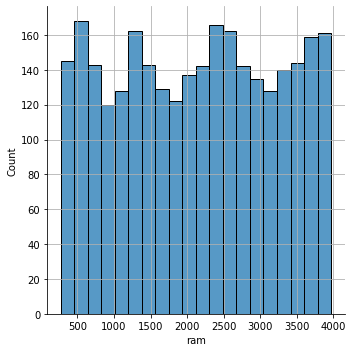

In [44]:
sns.displot(data['ram'], bins=20)
plt.grid()
pass

Распределение оперативной памяти при среднем = 2136 и отклонении = 1083. При этом 25% = 1210, 50% = 2181, 75% = 3068. 

Вычислим матрицу корреляции

In [45]:
corr_matrix = data.corr()
corr_matrix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011998,0.027703,-0.029329,0.045006,0.027099,-0.004363,0.036367,0.009955,-0.030992,...,0.016592,-0.002324,0.008383,-0.038116,-0.033667,0.052359,0.008346,-0.011229,0.005474,0.209181
blue,0.011998,1.000000,0.038897,0.026642,0.012370,0.005286,0.054356,0.006894,-0.024746,0.042086,...,-0.004650,-0.036353,0.031686,-0.012713,0.009608,0.002202,-0.052221,0.005661,-0.024131,0.023076
clock_speed,0.027703,0.038897,1.000000,0.021106,0.015256,-0.037968,0.011620,-0.024136,0.017319,-0.014519,...,-0.019039,-0.006861,0.012411,-0.011283,-0.002629,-0.013898,-0.047172,0.023502,-0.034809,0.002343
dual_sim,-0.029329,0.026642,0.021106,1.000000,-0.028922,0.002153,-0.012233,-0.018826,-0.003636,-0.019953,...,-0.022964,0.007001,0.046006,-0.018242,-0.017694,-0.037101,-0.007899,-0.004523,0.039253,0.024439
fc,0.045006,0.012370,0.015256,-0.028922,1.000000,-0.007077,-0.028808,-0.001025,0.017778,-0.016395,...,-0.008213,-0.015686,0.003936,-0.013279,-0.005489,-0.009514,0.012990,-0.002362,0.016641,0.014633
four_g,0.027099,0.005286,-0.037968,0.002153,-0.007077,1.000000,0.009793,-0.015670,-0.020902,-0.027199,...,-0.026712,0.012828,-0.001045,0.027707,0.043867,-0.052692,0.585862,0.018748,-0.011024,0.008688
int_memory,-0.004363,0.054356,0.011620,-0.012233,-0.028808,0.009793,1.000000,0.015662,-0.030230,-0.018749,...,0.008251,-0.003289,0.030967,0.044676,0.024482,0.006761,-0.018180,-0.008836,0.009111,0.040132
m_dep,0.036367,0.006894,-0.024136,-0.018826,-0.001025,-0.015670,0.015662,1.000000,0.014780,-0.013536,...,0.003548,0.020210,-0.003904,-0.023769,-0.014319,0.005794,-0.033816,0.004184,-0.035118,0.004452
mobile_wt,0.009955,-0.024746,0.017319,-0.003636,0.017778,-0.020902,-0.030230,0.014780,1.000000,-0.027086,...,0.004664,-0.001916,0.009560,-0.042164,-0.020148,-0.002075,0.001926,-0.025195,0.003934,-0.022229
n_cores,-0.030992,0.042086,-0.014519,-0.019953,-0.016395,-0.027199,-0.018749,-0.013536,-0.027086,1.000000,...,0.000687,0.030164,0.022090,0.006798,0.033627,0.000676,-0.019395,0.017690,-0.014078,0.020561


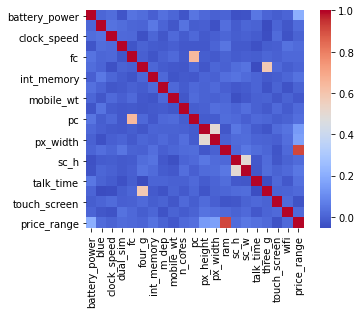

In [46]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения:

In [47]:
corr_matrix >= 0.5

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
blue,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
clock_speed,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
dual_sim,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
fc,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
four_g,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
int_memory,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
m_dep,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
mobile_wt,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
n_cores,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Коэффициент корреляции > 0,5 имеют: px_width и px_height, sc_h и sc_w, four_g и three_g, price_range и ram, что говорит о наличие связи между признаками.
Для признаков, у которых коэффициент корреляции < 0,5, можно сказать, что связь между ними слабая

Перейдем к рассмотрению категориальных признаков

In [48]:
data['blue'].value_counts()

0.0    1472
1.0    1392
Name: blue, dtype: int64

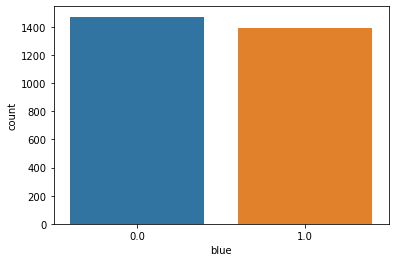

In [49]:
sns.countplot(x='blue', data=data)
pass

Число моделей с bluetooth приблизительно равно числу моделей без него.

In [50]:
data['dual_sim'].value_counts()

1.0    1466
0.0    1401
Name: dual_sim, dtype: int64

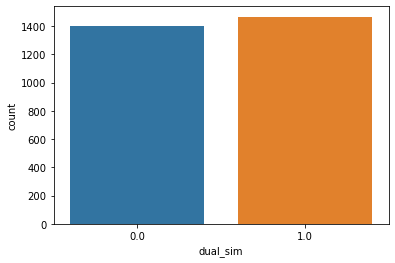

In [51]:
sns.countplot(x='dual_sim', data=data)
pass

Число моделей с поддержкой 2 симкарт немного больше.

In [52]:
data['four_g'].value_counts()

1.0    1471
0.0    1389
Name: four_g, dtype: int64

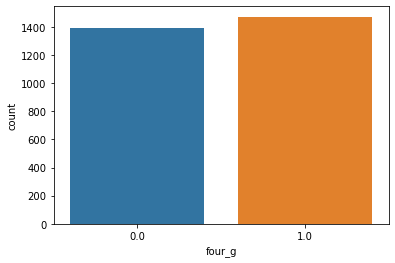

In [53]:
sns.countplot(x='four_g', data=data)
pass

Число моделей с поддержкой 4G немного больше.

In [54]:
data['three_g'].value_counts()

1.0    2171
0.0     700
Name: three_g, dtype: int64

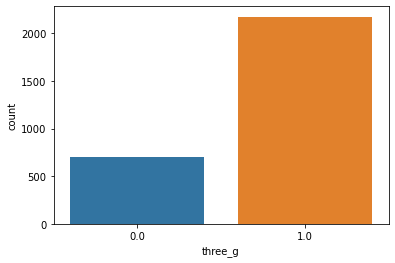

In [55]:
sns.countplot(x='three_g', data=data)
pass

Число моделей с поддержкой 3G примерно в 3 раза больше

In [56]:
data['touch_screen'].value_counts()

1.0    1460
0.0    1416
Name: touch_screen, dtype: int64

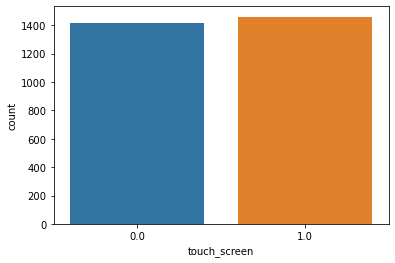

In [57]:
sns.countplot(x='touch_screen', data=data)
pass

Число моделей с сенсорным экраном приблизительно равно числу моделей без него

In [58]:
data['wifi'].value_counts()

1.0    1475
0.0    1401
Name: wifi, dtype: int64

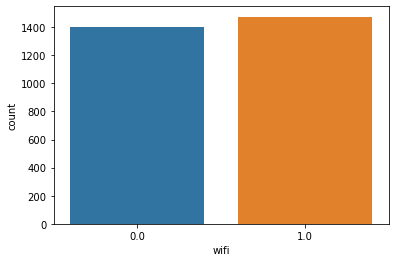

In [59]:
sns.countplot(x='wifi', data=data)
pass

Число моделей с поддержкой WiFi немного больше.

In [60]:
data['price_range'].value_counts()

2    733
3    732
0    720
1    694
Name: price_range, dtype: int64

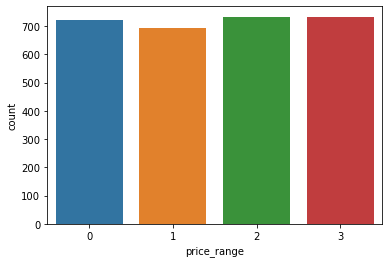

In [61]:
sns.countplot(x='price_range', data=data)
pass

Ценовой диапозон выставлен примерно одинаково

Удалим строки с пропущенными значениями

## 3. Обработка пропущенных значений 
Число пропущенных значений мало

In [62]:
data.dropna(axis=0, how='all', subset=['battery_power'], inplace=True)
data.dropna(axis=0, how='all', subset=['blue'], inplace=True)
data.dropna(axis=0, how='all', subset=['clock_speed'], inplace=True)
data.dropna(axis=0, how='all', subset=['dual_sim'], inplace=True)
data.dropna(axis=0, how='all', subset=['fc'], inplace=True)
data.dropna(axis=0, how='all', subset=['four_g'], inplace=True)
data.dropna(axis=0, how='all', subset=['int_memory'], inplace=True)
data.dropna(axis=0, how='all', subset=['m_dep'], inplace=True)
data.dropna(axis=0, how='all', subset=['mobile_wt'], inplace=True)
data.dropna(axis=0, how='all', subset=['n_cores'], inplace=True)
data.dropna(axis=0, how='all', subset=['pc'], inplace=True)
data.dropna(axis=0, how='all', subset=['px_height'], inplace=True)
data.dropna(axis=0, how='all', subset=['px_width'], inplace=True)
data.dropna(axis=0, how='all', subset=['ram'], inplace=True)
data.dropna(axis=0, how='all', subset=['sc_h'], inplace=True)
data.dropna(axis=0, how='all', subset=['sc_w'], inplace=True)
data.dropna(axis=0, how='all', subset=['talk_time'], inplace=True)
data.dropna(axis=0, how='all', subset=['three_g'], inplace=True)
data.dropna(axis=0, how='all', subset=['touch_screen'], inplace=True)
data.dropna(axis=0, how='all', subset=['wifi'], inplace=True)
print(data.shape)
data.isna().sum()

(2721, 21)


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 4. Обработка категориальных признаков
Все категориальные признаки уже заданы числовыми значениями
## 5. Нормализация
Проведем нормализацию с помощью линейного преобразования к отрезку [0, 1]

In [63]:
data_norm = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
data_norm.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,...,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000
mean,0.494282,0.488423,0.409247,0.508269,0.238985,0.514149,0.490190,0.448242,0.506517,0.504069,...,0.327427,0.499883,0.505929,0.524203,0.318857,0.498489,0.755972,0.505696,0.514884,0.507902
std,0.293952,0.499958,0.328669,0.500024,0.241883,0.499892,0.293178,0.318928,0.294342,0.326937,...,0.226641,0.289104,0.292533,0.300177,0.242910,0.301650,0.429588,0.500059,0.499870,0.373484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233557,0.000000,0.080000,0.000000,0.055556,0.000000,0.225806,0.111111,0.241667,0.285714,...,0.140306,0.247811,0.254531,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000,0.333333
50%,0.489933,0.000000,0.400000,1.000000,0.166667,1.000000,0.483871,0.444444,0.516667,0.428571,...,0.286224,0.498316,0.520151,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000,0.666667
75%,0.746980,1.000000,0.680000,1.000000,0.388889,1.000000,0.741935,0.777778,0.758333,0.857143,...,0.485204,0.750168,0.757371,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6. Обучающая и тестовая выборки
Для классификации используем все признаки. Разобьем данные на обучающую и тестовую выборки. За обучающую примем 75%, оставшиеся  - за тестовую

In [64]:
X = data_norm.drop(['price_range'], axis=1)
y = data['price_range']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(2040, 681)

## 7-8-9. Обучение модели
### K ближайших соседей
Пусть К = 5 (по умолчанию)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn_def = KNeighborsClassifier()
knn_def.fit(X_train, y_train)
knn_train_pred = 100 * knn_def.score(X_train, y_train)
knn_test_pred = 100 * knn_def.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 66.32%, Test: 44.93%. 


Увеличим число соседей до 7

In [66]:
knn_7 = KNeighborsClassifier(n_neighbors = 7)
knn_7.fit(X_train, y_train)
knn_train_pred = 100 * knn_7.score(X_train, y_train)
knn_test_pred = 100 * knn_7.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 64.51%, Test: 44.49%. 


Точность полученной модели снизилась, попробуем К = 3

In [67]:
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(X_train, y_train)
knn_train_pred = 100 * knn_3.score(X_train, y_train)
knn_test_pred = 100 * knn_3.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 77.84%, Test: 42.44%. 


Точность увеличилась. Вычислим среднеквадратическую ошибку для алгоритма с количеством ближайших соседей по умолчанию

In [68]:
knn_train_pred = knn_def.score(X_train, y_train)
knn_test_pred = knn_def.score(X_test, y_test)
MSE_train = np.mean((knn_train_pred - y_train)**2)
MSE_test  = np.mean((knn_test_pred - y_test)**2)
print("MSE. Train : {:.2f}, Test: {:.2f}. ".format(MSE_train, MSE_test))

MSE. Train : 2.04, Test: 2.24. 


### Дерево решений
Воспользуемся параметрами по умолчанию - глубина отсутствует

In [69]:
from sklearn.tree import DecisionTreeClassifier
desTrCl = DecisionTreeClassifier()
desTrCl.fit(X_train,y_train)
desTrCl_train_sc = 100 * desTrCl.score(X_train, y_train)
print ('Depth:', desTrCl.get_depth())
print ('Leaves:', desTrCl.get_n_leaves())
desTrCl_test_sc = 100 * desTrCl.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(desTrCl_train_sc, desTrCl_test_sc))

Depth: 12
Leaves: 150
Accuracy. Train : 100.00%, Test: 91.48%. 


Максимальная глубина = 12. Уменьшим до 6

In [70]:
desTrCl_6 = DecisionTreeClassifier(max_depth=6)
desTrCl_6.fit(X_train,y_train)
desTrCl_train_sc = 100 * desTrCl_6.score(X_train, y_train)
print ('Depth:', desTrCl_6.get_depth())
print ('Leaves:', desTrCl_6.get_n_leaves())
desTrCl_test_sc = 100 * desTrCl_6.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(desTrCl_train_sc, desTrCl_test_sc))

Depth: 6
Leaves: 55
Accuracy. Train : 93.14%, Test: 88.11%. 


Качество модели на тестовой и обучающей выборках снизилось.

Увеличим глубину до 9

In [72]:
desTrCl_9 = DecisionTreeClassifier(max_depth=9)
desTrCl_9.fit(X_train,y_train)
desTrCl_train_sc = 100 * desTrCl_9.score(X_train, y_train)
print ('Depth:', desTrCl_9.get_depth())
print ('Leaves:', desTrCl_9.get_n_leaves())
desTrCl_test_sc = 100 * desTrCl_9.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(desTrCl_train_sc, desTrCl_test_sc))

Depth: 9
Leaves: 138
Accuracy. Train : 99.41%, Test: 90.60%. 


Качество модели на тестовой и обучающей выборках повысилось.

Алгоритм дерева решений оказался точнее алгоритма к-ближайших соседей при оптимальных параметрах каждого из методов, как на обучающей выборке, так и на тестовой.

## 10. Общие выводы

В работе производился анализ данных о ценовом диапазоне мобильных телефонов и решение задачи классификации с помощью моделей, которые были натренированы методами К-ближайших соседей и дерева решений.
В ходе работы проведены:
1. Работа с выбросами
2. Вычисление основных статистических характеристик и их анализ
3. Обработка пропущенных значений (удаление строк с пропущенными значениями)
4. Нормализация количественных признаков (с помощью линейного преобразования к отрезку [0, 1])
5. Разбиение данных на обучающую и тестовую выборки
6. Выбор алгоритма классификации и проверка качества модели
7. Сравнение 2 моделей, алгоритм дерева решений оказался лучше метода к-ближайших соседей.